<a href="https://colab.research.google.com/github/morganssyt/learning_projects/blob/main/titanic_machine_learning/titanic_dataset_predictionml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Machine Learning – Learning Project

This notebook is a learning exercise focused on
the machine learning workflow using the Titanic dataset.

In [ ]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## Exploratory Data Analysis

In [ ]:
#Looking at the dataset
titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

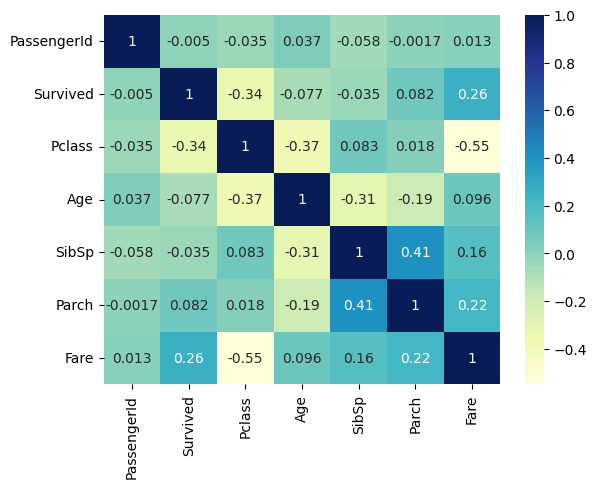

In [ ]:
#Exploring the correlation
import seaborn as sns
sns.heatmap(titanic_data.select_dtypes(include=np.number).corr(),annot=True, cmap='YlGnBu')

In [ ]:

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2)
for train_indecess, test_index in split.split(titanic_data, titanic_data[['Survived', 'Pclass', "Sex"]]):
  strat_train = titanic_data.loc[train_indecess]
  strat_test = titanic_data.loc[test_index]

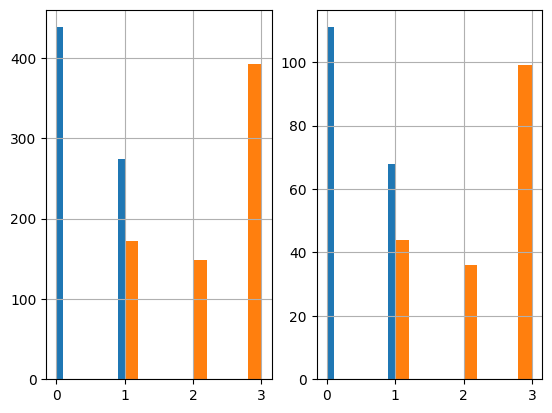

In [ ]:
plt.subplot(1,2,1)
strat_train['Survived'].hist()
strat_train['Pclass'].hist()


plt.subplot(1,2,2)
strat_test['Survived'].hist()
strat_test['Pclass'].hist()


plt.show()

In [ ]:
strat_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 40 to 4
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          573 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        160 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


## Preprocessing

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer

class AgeImputer(BaseEstimator, TransformerMixin):
  def fit (self, X, y= None):
    return self

  def transform (self, X):
    imputer = SimpleImputer(strategy='mean')
    X['Age'] = imputer.fit_transform(X[['Age']])
    return X



In [ ]:
#Preprocessing and data handling

from sklearn.preprocessing import OneHotEncoder

class FeatureEncoder(BaseEstimator, TransformerMixin):
  def fit (self, X, y= None):
    return self

  def transform (self, X):
    encoder = OneHotEncoder()
    matrix= encoder.fit_transform(X[['Embarked']]).toarray()
    column_names= ['C', 'S', 'Q', 'N']
    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    matrix= encoder.fit_transform(X[['Sex']]).toarray()

    column_names= ['Female', 'Male']

    for i in range(len(matrix.T)):
      X[column_names[i]] = matrix.T[i]

    return X




In [ ]:
class FeatureDropper(BaseEstimator, TransformerMixin):

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    return X.drop(['Name', 'Ticket', 'Cabin', 'Embarked', 'Sex', 'N'], axis=1, errors='ignore')




In [ ]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
  ('age_imputer', AgeImputer()),
  ('feature_encoder', FeatureEncoder()),
  ('feature_dropper', FeatureDropper())
])


In [ ]:
strat_train_set = pipeline.fit_transform(strat_train)
strat_train_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
40,41,0,3,40.000000,1,0,9.4750,0.0,0.0,1.0,1.0,0.0
250,251,0,3,29.442705,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
879,880,1,1,56.000000,0,1,83.1583,1.0,0.0,0.0,1.0,0.0
132,133,0,3,47.000000,1,0,14.5000,0.0,0.0,1.0,1.0,0.0
770,771,0,3,24.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
468,469,0,3,29.442705,0,0,7.7250,0.0,1.0,0.0,0.0,1.0
327,328,1,2,36.000000,0,0,13.0000,0.0,0.0,1.0,1.0,0.0
42,43,0,3,29.442705,0,0,7.8958,1.0,0.0,0.0,0.0,1.0
709,710,1,3,29.442705,1,1,15.2458,1.0,0.0,0.0,0.0,1.0


In [ ]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 40 to 4
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Age          712 non-null    float64
 4   SibSp        712 non-null    int64  
 5   Parch        712 non-null    int64  
 6   Fare         712 non-null    float64
 7   C            712 non-null    float64
 8   S            712 non-null    float64
 9   Q            712 non-null    float64
 10  Female       712 non-null    float64
 11  Male         712 non-null    float64
dtypes: float64(7), int64(5)
memory usage: 72.3 KB


In [ ]:
from sklearn.preprocessing import StandardScaler

X = strat_train_set.drop('Survived', axis=1)
y = strat_train_set['Survived']

scaler = StandardScaler()
X_data = scaler.fit_transform(X)
y_data = y.to_numpy()

## Modeling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
param_grid = [{
    'n_estimators': [10,100, 200, 500], "max_depth": [None, 5, 10,], "min_samples_split": [2,3,4]
}]
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_data, y_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
final_clf = grid_search.best_estimator_
final_clf

RandomForestClassifier(max_depth=10, min_samples_split=4, n_estimators=200)

In [ ]:
strat_test_set = pipeline.fit_transform(strat_test)
strat_test_set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
282,283,0,3,16.000000,0,0,9.5000,0.0,0.0,1.0,0.0,1.0
638,639,0,3,41.000000,0,5,39.6875,0.0,0.0,1.0,1.0,0.0
429,430,1,3,32.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
330,331,1,3,30.741135,2,0,23.2500,0.0,1.0,0.0,1.0,0.0
699,700,0,3,42.000000,0,0,7.6500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
727,728,1,3,30.741135,0,0,7.7375,0.0,1.0,0.0,1.0,0.0
111,112,0,3,14.500000,1,0,14.4542,1.0,0.0,0.0,1.0,0.0
844,845,0,3,17.000000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
872,873,0,1,33.000000,0,0,5.0000,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_test = strat_test_set.drop('Survived', axis=1)
y_test = strat_test_set['Survived']

scaler = StandardScaler()
X_test_data = scaler.fit_transform(X_test)
y_data_test= y_test.to_numpy()

In [ ]:
final_clf.score(X_test_data, y_data_test)


0.8212290502793296

In [ ]:
final_data = pipeline.fit_transform(titanic_data)
final_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,1,0,3,22.000000,1,0,7.2500,0.0,0.0,1.0,0.0,1.0
1,2,1,1,38.000000,1,0,71.2833,1.0,0.0,0.0,1.0,0.0
2,3,1,3,26.000000,0,0,7.9250,0.0,0.0,1.0,1.0,0.0
3,4,1,1,35.000000,1,0,53.1000,0.0,0.0,1.0,1.0,0.0
4,5,0,3,35.000000,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,0.0,0.0,1.0,0.0,1.0
887,888,1,1,19.000000,0,0,30.0000,0.0,0.0,1.0,1.0,0.0
888,889,0,3,29.699118,1,2,23.4500,0.0,0.0,1.0,1.0,0.0
889,890,1,1,26.000000,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


In [ ]:
X_final= final_data.drop('Survived', axis=1)
y_final = final_data['Survived']

scaler = StandardScaler()
X_final_data = scaler.fit_transform(X_final)
y_final_data = y_final.to_numpy()

In [ ]:
prod_clf = RandomForestClassifier()
param_grid = [{
    'n_estimators': [10,100, 200, 500], "max_depth": [None, 5, 10,], "min_samples_split": [2,3,4]
}]
grid_search = GridSearchCV(prod_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True)
grid_search.fit(X_final_data, y_final_data)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [None, 5, 10],
                          'min_samples_split': [2, 3, 4],
                          'n_estimators': [10, 100, 200, 500]}],
             return_train_score=True, scoring='accuracy')

In [ ]:
prod_final_clf = grid_search.best_estimator_
prod_final_clf

RandomForestClassifier(max_depth=5, n_estimators=500)

In [ ]:
titanic_test_data= pd.read_csv('test.csv')
titanic_test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
final_test_data = pipeline.fit_transform(titanic_test_data)
final_test_data

,PassengerId,Pclass,Age,SibSp,Parch,Fare,C,S,Q,Female,Male
0,892,3,34.50000,0,0,7.8292,0.0,1.0,0.0,0.0,1.0
1,893,3,47.00000,1,0,7.0000,0.0,0.0,1.0,1.0,0.0
2,894,2,62.00000,0,0,9.6875,0.0,1.0,0.0,0.0,1.0
3,895,3,27.00000,0,0,8.6625,0.0,0.0,1.0,0.0,1.0
4,896,3,22.00000,1,1,12.2875,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0
414,1306,1,39.00000,0,0,108.9000,1.0,0.0,0.0,1.0,0.0
415,1307,3,38.50000,0,0,7.2500,0.0,0.0,1.0,0.0,1.0
416,1308,3,30.27259,0,0,8.0500,0.0,0.0,1.0,0.0,1.0


In [ ]:
X_final_test= final_test_data
X_final_test = X_final_test.fillna(method = 'ffill')

scaler = StandardScaler()
X_final_test_data = scaler.fit_transform(X_final_test)


/tmp/ipython-input-1785514006.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X_final_test = X_final_test.fillna(method = 'ffill')


In [ ]:
predictions = prod_final_clf.predict(X_final_test_data)
predictions

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
import os

final_df = pd.DataFrame(titanic_test_data['PassengerId'])
final_df['Survived'] = predictions

# Create the 'data' directory if it doesn't exist
os.makedirs('data', exist_ok=True)

final_df.to_csv('data/predictions.csv', index= False)

## Key Takeaways

- Practiced data cleaning and EDA
- Built a classification model
- Learned the end-to-end ML workflow (Evaluation on kaggle, 0.78 value)